<a href="https://colab.research.google.com/github/notSoumya/Network-Routing-Optimizer/blob/main/visualisation/Network_Routing_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx matplotlib pandas


In [2]:
from google.colab import files
uploaded = files.upload()


Saving network.txt to network.txt


In [3]:
import networkx as nx

def load_graph(filename):
    G = nx.Graph()
    with open(filename, "r") as f:
        for line in f:
            u, v, w = map(int, line.split())
            G.add_edge(u, v, weight=w)
    return G

G = load_graph("network.txt")
print("Graph loaded with", G.number_of_nodes(), "nodes.")


Graph loaded with 12 nodes.


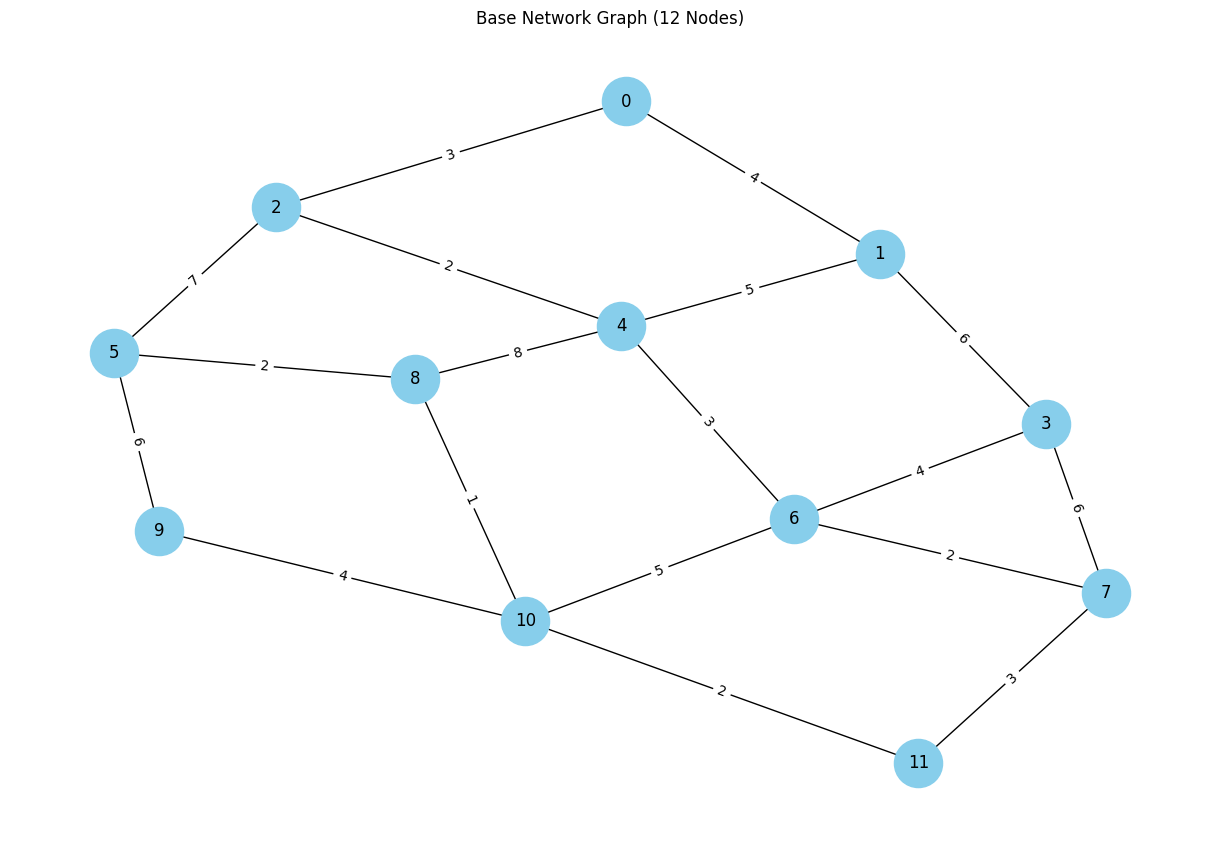

In [20]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)

def draw_graph(G):
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True,
        node_color="skyblue", node_size=1200,
        font_size=12
    )
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=nx.get_edge_attributes(G, "weight")
    )
    plt.title("Base Network Graph (12 Nodes)")
    plt.axis("off")
    plt.show()

draw_graph(G)


In [21]:
def visualize_shortest_path(G, start, end, load=None, capacity=None):
    try:
        path = nx.dijkstra_path(G, start, end, weight="weight")
        dist = nx.dijkstra_path_length(G, start, end, weight="weight")
        print("✔ Shortest Path:", path)
        print("Total Weight =", dist)

        # DEFINE POSITION HERE (IMPORTANT)
        pos = nx.spring_layout(G, seed=42)

        # Color logic
        node_colors = []
        for n in G.nodes():
            if load and capacity and load[n] >= capacity[n]:
                node_colors.append("red")     # overloaded
            elif n in path:
                node_colors.append("yellow")  # currently used
            else:
                node_colors.append("skyblue") # normal

        # Draw graph
        plt.figure(figsize=(12, 8))
        nx.draw(
            G, pos,
            node_color=node_colors,
            with_labels=True,
            node_size=1200,
            font_size=12
        )

        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=nx.get_edge_attributes(G, "weight")
        )

        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(
            G, pos, edgelist=edges, width=4, edge_color="red"
        )

        plt.title(f"Shortest Path: {start} → {end}")
        plt.axis("off")
        plt.show()

    except:
        print("❌ No path found!")


✔ Shortest Path: [0, 2, 4, 6, 7, 11]
Total Weight = 13


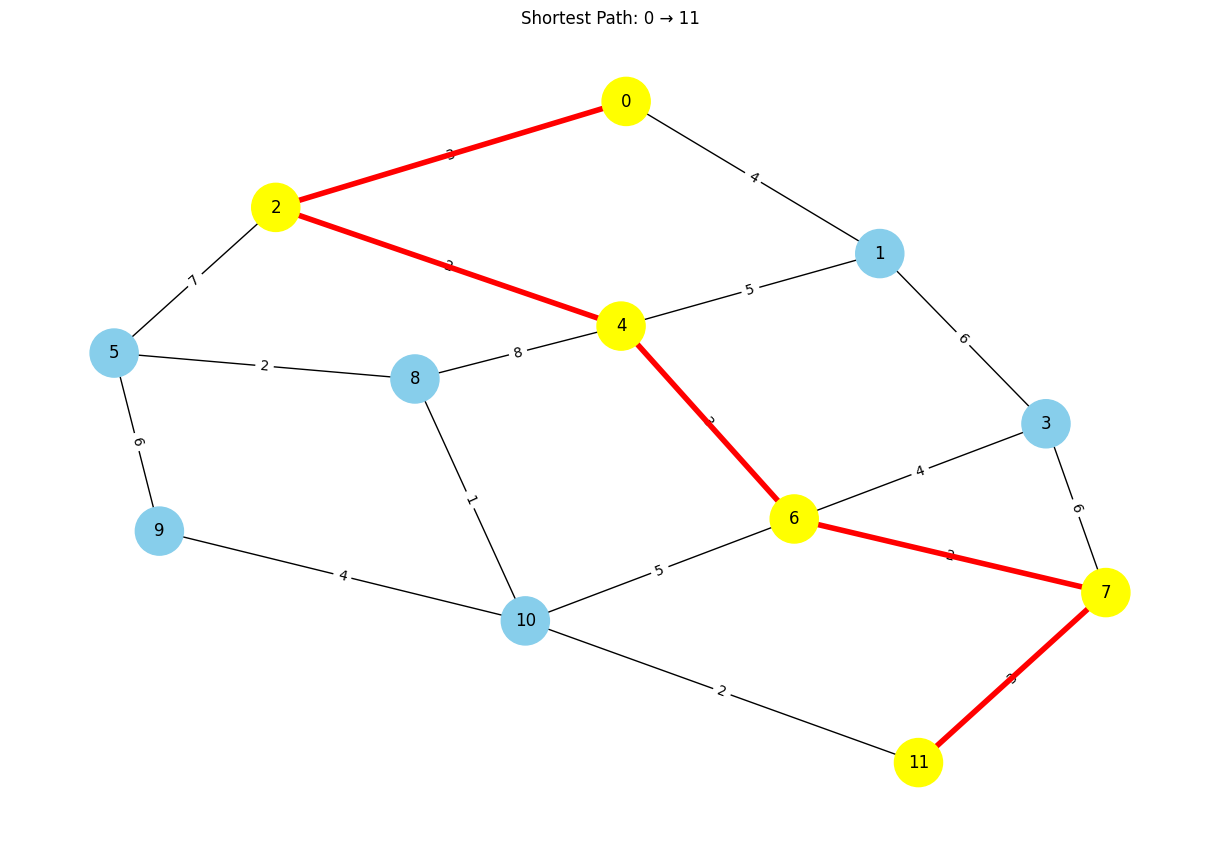

In [18]:
visualize_shortest_path(G, 0, 11)


In [10]:
def block_node(G, node):
    if node in G.nodes():
        G.remove_node(node)
        print(f"🟥 Node {node} has been BLOCKED and removed.")
    else:
        print("Node not found.")

def reload_graph():
    return load_graph("network.txt")


🟥 Node 4 has been BLOCKED and removed.
✔ Shortest Path: [0, 2, 5, 8, 10, 11]
Total Weight = 15


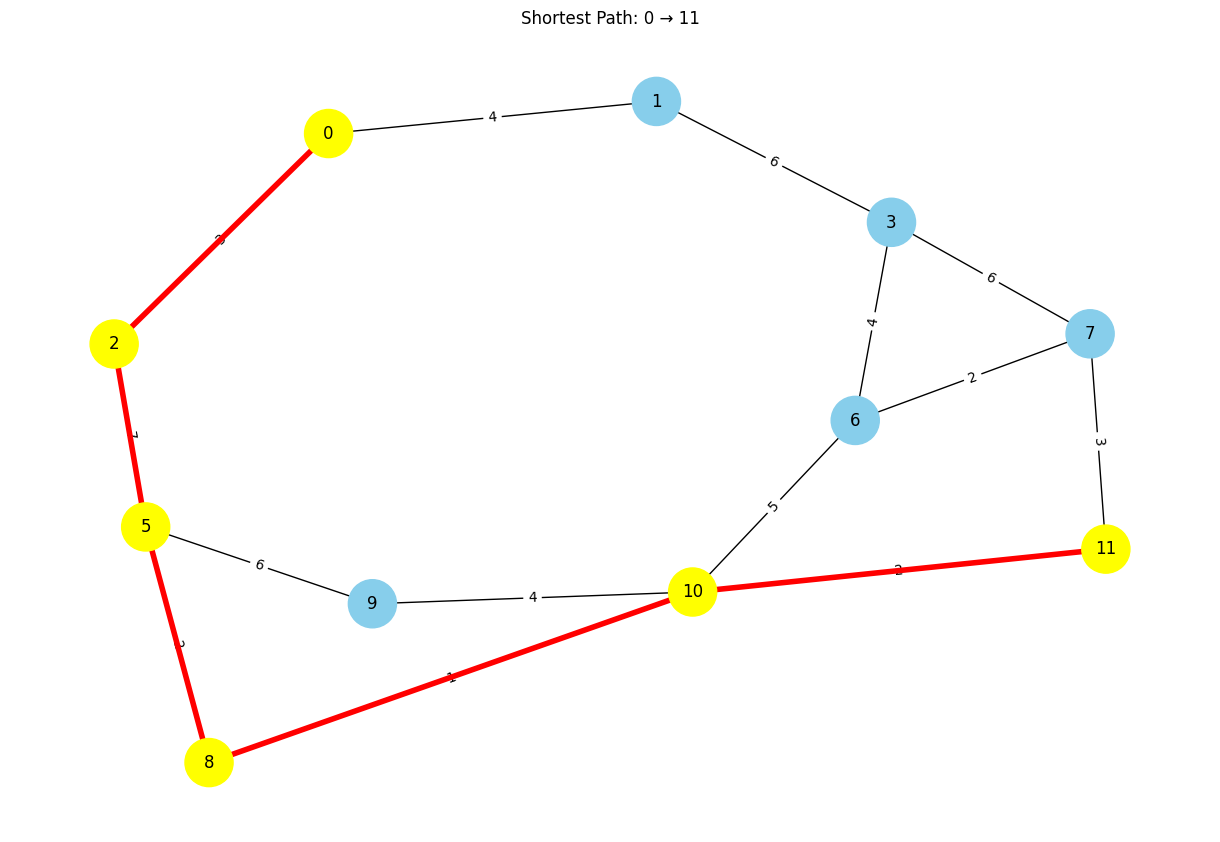

In [22]:
block_node(G, 4)  # block node 4 as an example
visualize_shortest_path(G, 0, 11)


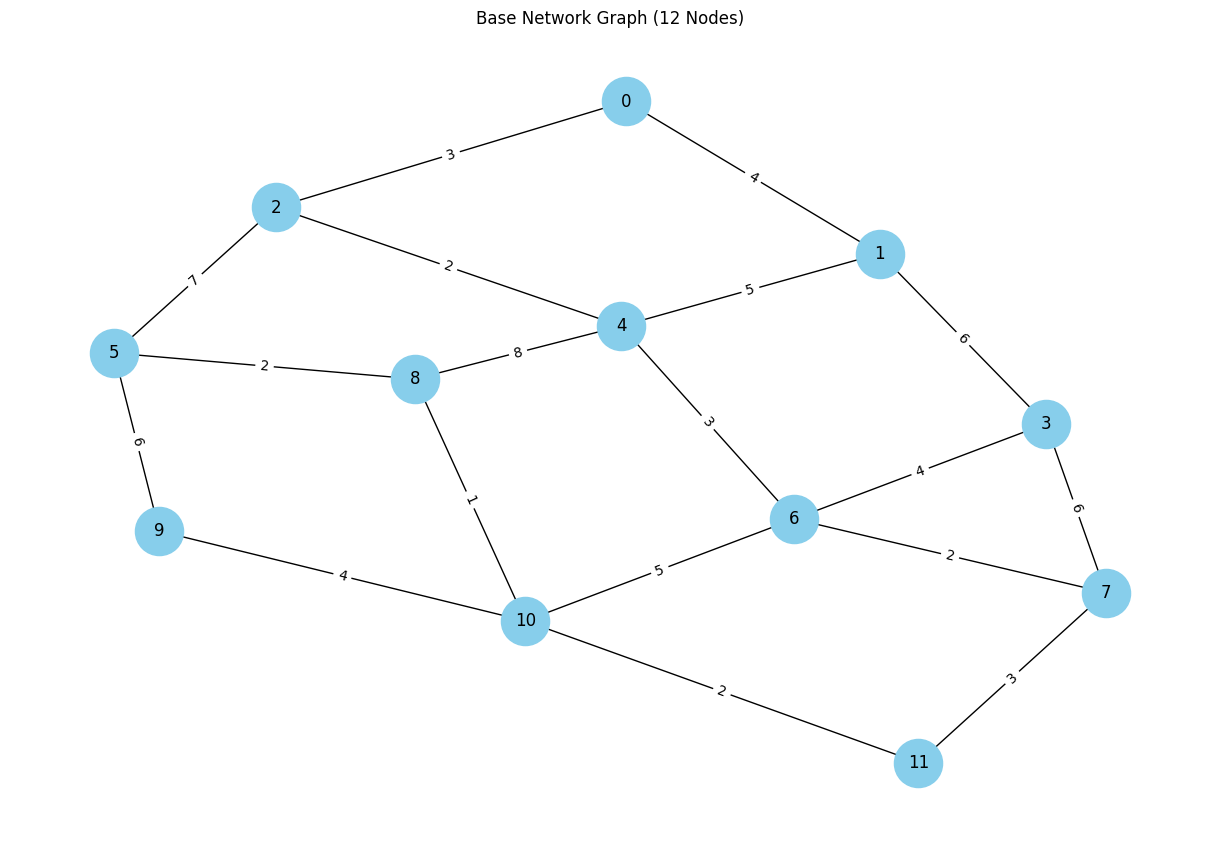

In [12]:
G = reload_graph()
draw_graph(G)


In [16]:
capacity = {
    0: 3,
    1: 2,
    2: 1,   # OVERLOADS FIRST
    3: 4,
    4: 2,
    5: 3,
    6: 5,
    7: 3,
    8: 3,
    9: 4,
    10: 2,
    11: 3
}
load = {n: 0 for n in G.nodes()}      # start empty

def dijkstra_with_capacity(G, start, end):
    G2 = G.copy()

    overloaded = []
    for n in list(G.nodes()):
        if load[n] >= capacity[n]:
            overloaded.append(n)
            G2.remove_node(n)

    if overloaded:
        print("⚠ Overloaded nodes removed:", overloaded)

    try:
        path = nx.dijkstra_path(G2, start, end, weight="weight")
    except:
        print("❌ No available path — all options overloaded!")
        return

    for n in path:
        load[n] += 1

    visualize_shortest_path(G2, start, end, load, capacity)


--- Routing attempt 1 ---
✔ Shortest Path: [0, 2, 4, 6, 7, 11]
Total Weight = 13


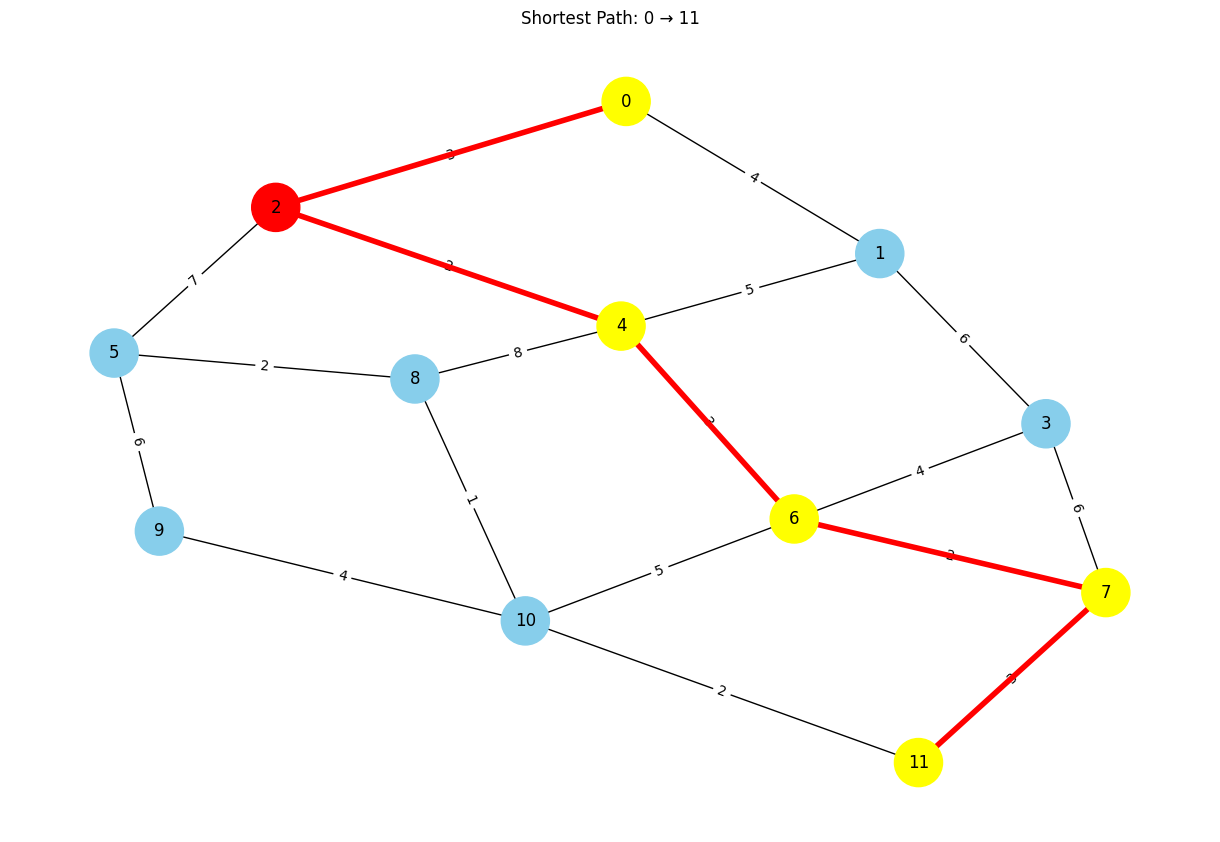

--- Routing attempt 2 ---
⚠ Overloaded nodes removed: [2]
✔ Shortest Path: [0, 1, 4, 6, 7, 11]
Total Weight = 17


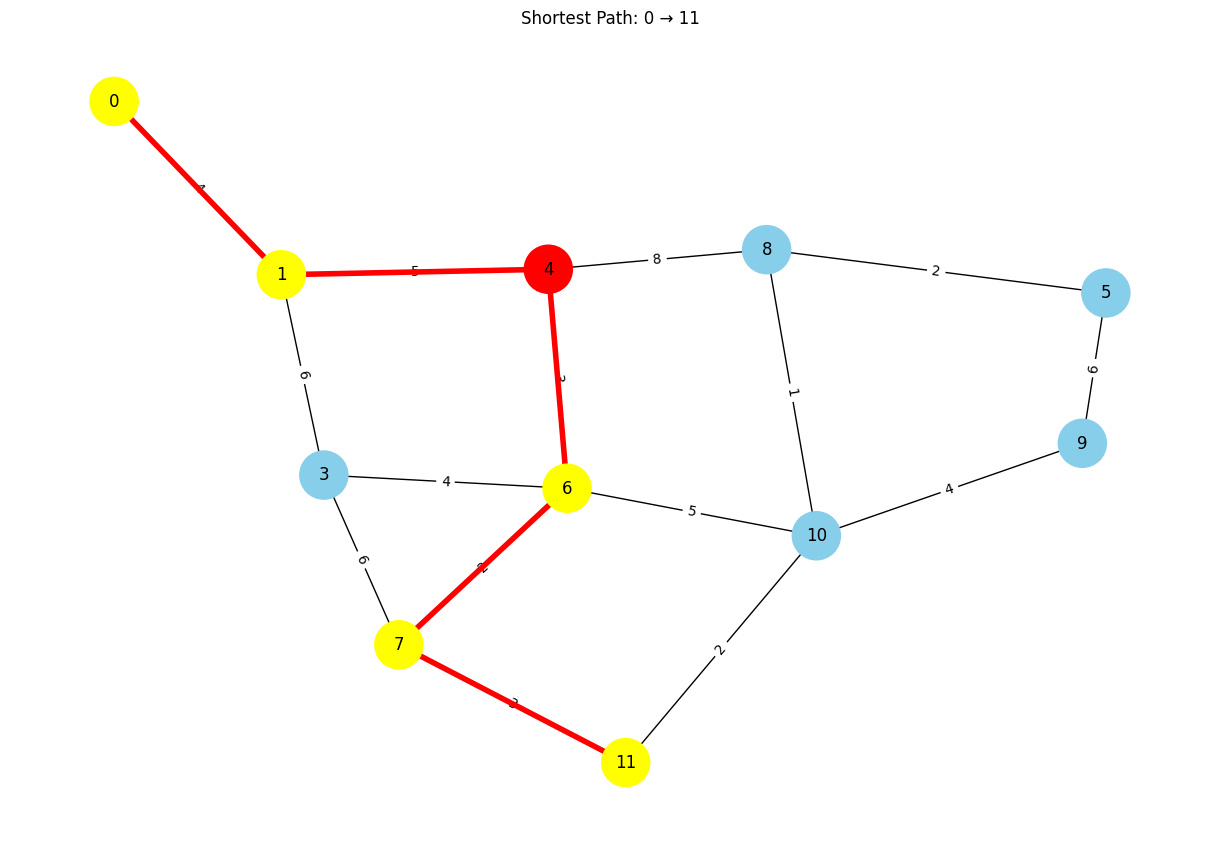

--- Routing attempt 3 ---
⚠ Overloaded nodes removed: [2, 4]
✔ Shortest Path: [0, 1, 3, 7, 11]
Total Weight = 19


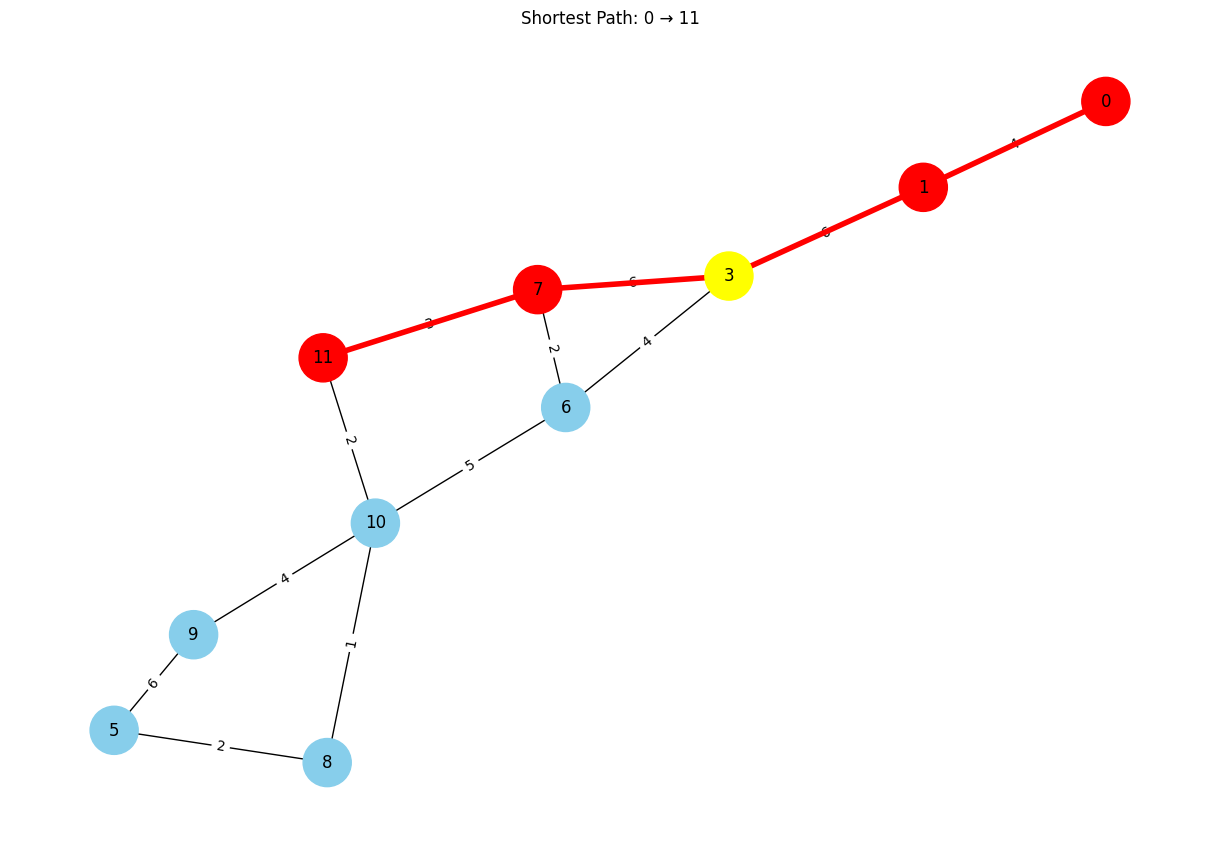

--- Routing attempt 4 ---
⚠ Overloaded nodes removed: [0, 1, 2, 4, 7, 11]
❌ No available path — all options overloaded!
--- Routing attempt 5 ---
⚠ Overloaded nodes removed: [0, 1, 2, 4, 7, 11]
❌ No available path — all options overloaded!


In [17]:
# Run repeatedly to overload nodes
for i in range(5):
    print(f"--- Routing attempt {i+1} ---")
    dijkstra_with_capacity(G, 0, 11)


In [15]:
import pandas as pd

df = pd.DataFrame({
    "Node": list(G.nodes()),
    "Load": [load[n] for n in G.nodes()],
    "Capacity": [capacity[n] for n in G.nodes()]
})

df


,Node,Load,Capacity
0,0,3,3
1,1,0,3
2,2,3,3
3,3,0,3
4,4,3,3
5,5,0,3
6,6,3,3
7,7,3,3
8,8,0,3
9,9,0,3
